<a href="https://colab.research.google.com/github/Giraldo0712/TAM_2025_2/blob/main/5_DeepLearning/2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [1]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- Se presenta un ejemplo de la base de datos

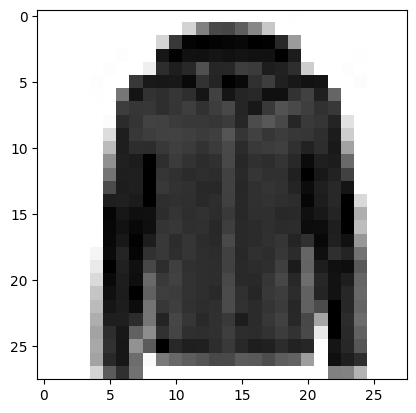

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

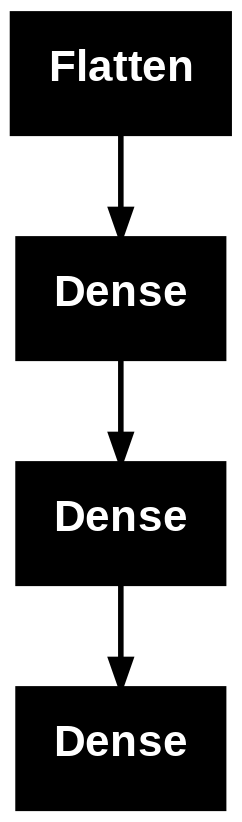

In [6]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

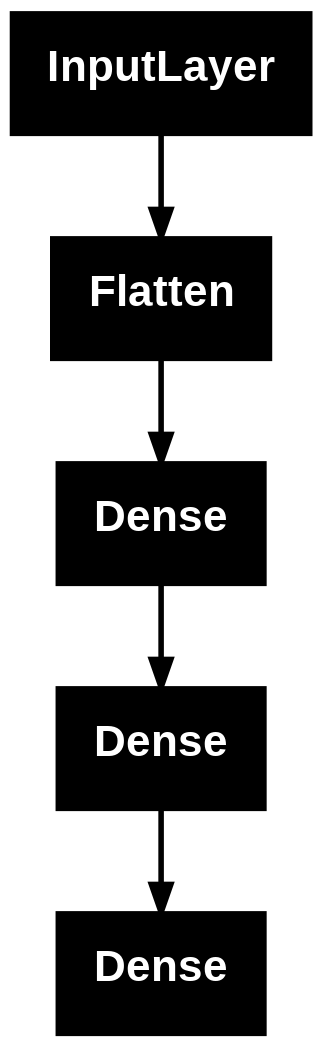

In [7]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


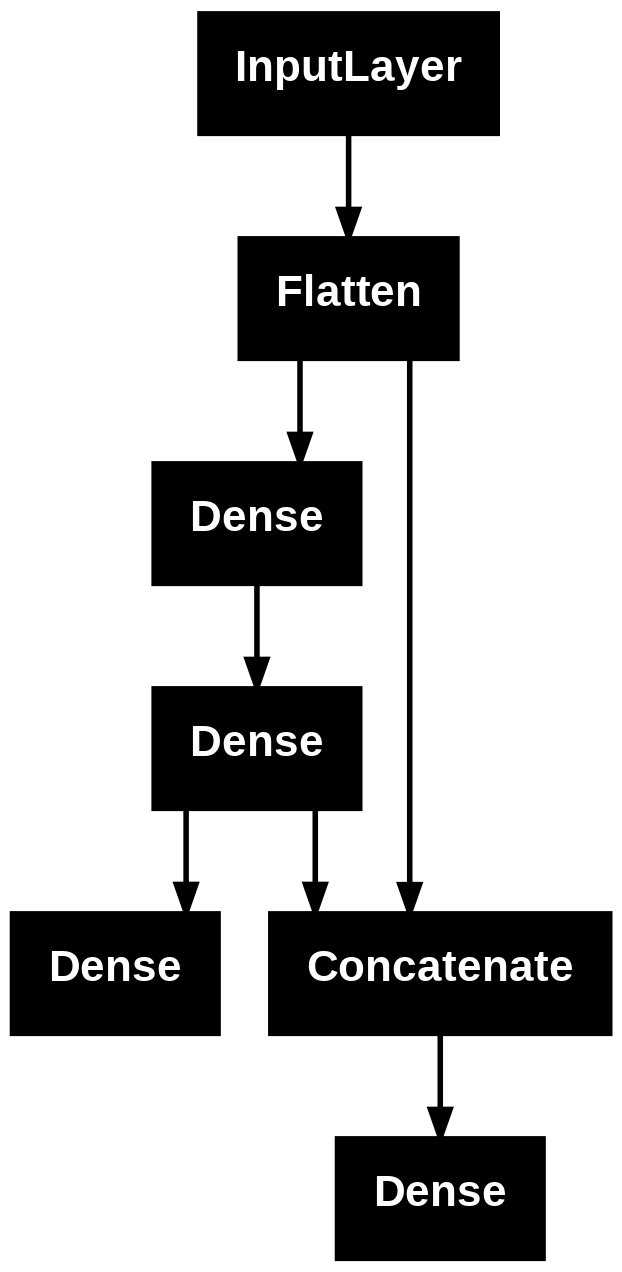

In [8]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [9]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [10]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.5122 - outputA_accuracy: 0.7238 - outputA_loss: 0.8176 - outputB_accuracy: 0.7595 - outputB_loss: 0.6946 - val_loss: 0.8502 - val_outputA_accuracy: 0.8472 - val_outputA_loss: 0.4275 - val_outputB_accuracy: 0.8509 - val_outputB_loss: 0.4219
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7992 - outputA_accuracy: 0.8544 - outputA_loss: 0.4040 - outputB_accuracy: 0.8563 - outputB_loss: 0.3952 - val_loss: 0.8248 - val_outputA_accuracy: 0.8432 - val_outputA_loss: 0.4166 - val_outputB_accuracy: 0.8512 - val_outputB_loss: 0.4072
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7046 - outputA_accuracy: 0.8712 - outputA_loss: 0.3568 - outputB_accuracy: 0.8740 - outputB_loss: 0.3478 - val_loss: 0.7434 - val_outputA_accuracy: 0.8638 - val_outputA_loss: 0.3757 - val_outputB_accuracy: 0.8657 - val_outputB_loss: 0.3665
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6507 - outputA_accuracy: 0.8803 

- Se presentan las curvas de desempeño:

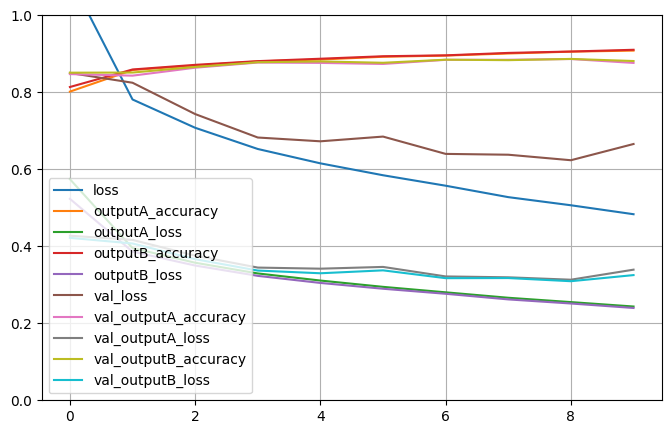

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [12]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10) (10000, 10)


In [13]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [14]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7266 - outputA_accuracy: 0.8714 - outputA_loss: 0.3694 - outputB_accuracy: 0.8776 - outputB_loss: 0.3572
[0.7228684425354004, 0.3671216070652008, 0.35513755679130554, 0.8700000047683716, 0.8751000165939331]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

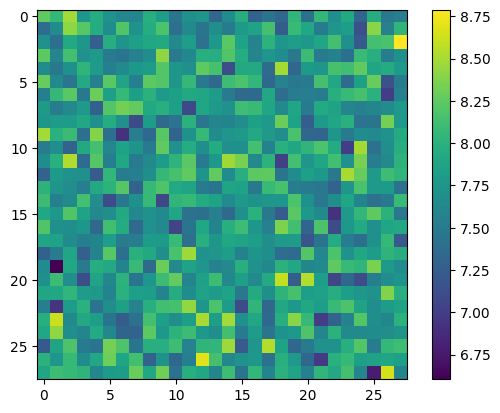

In [15]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [16]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

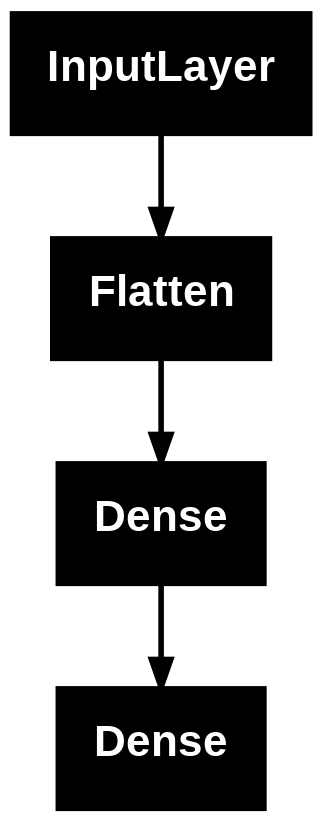

In [17]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [18]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [19]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

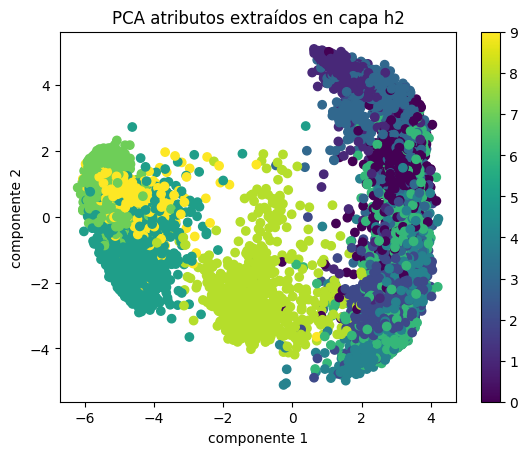

In [20]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [21]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

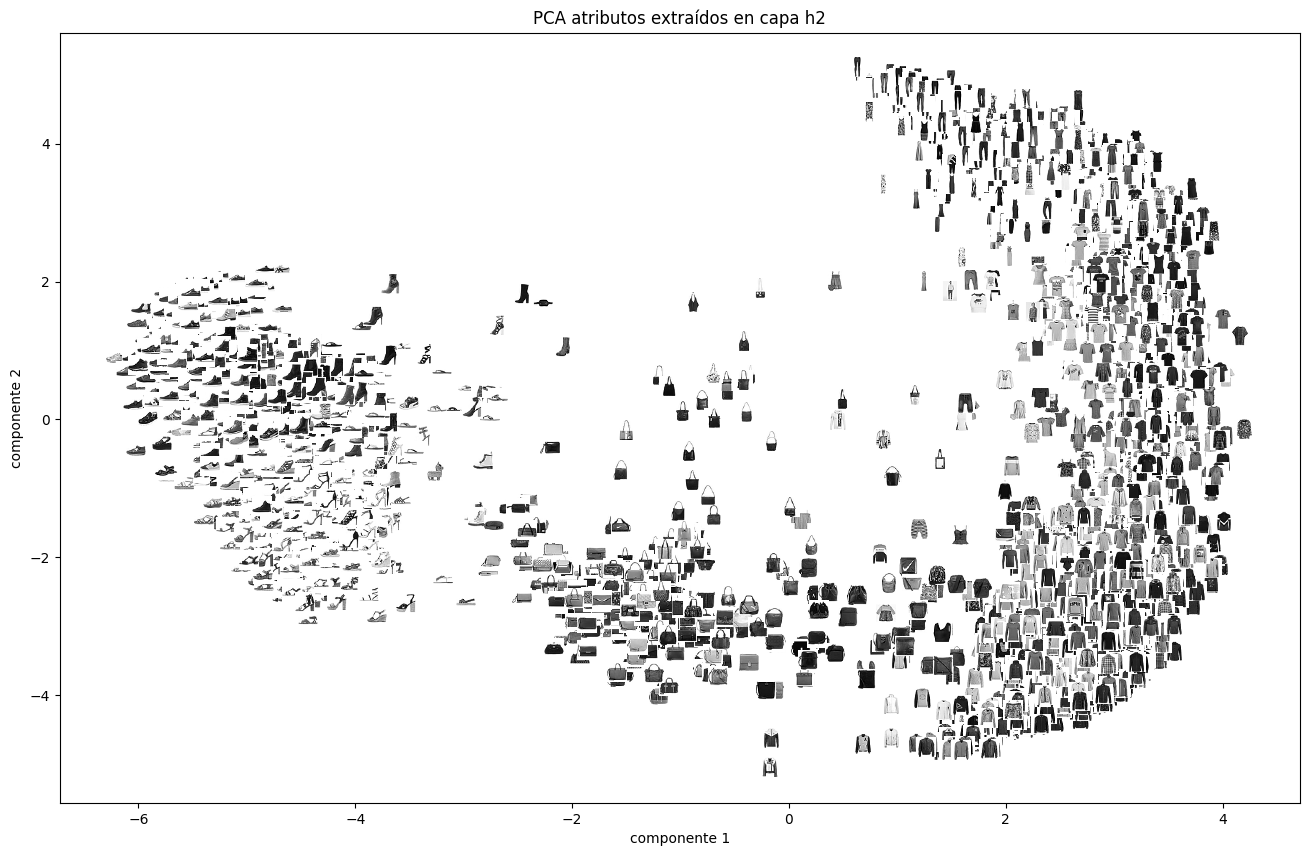

In [22]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [23]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


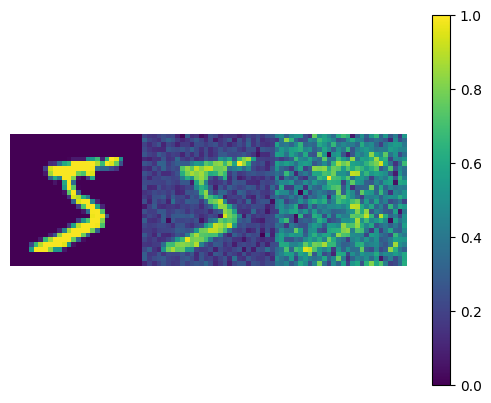

In [24]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [25]:
#veector de salida par o impar
ytrain_B = (y_train % 2)
print(ytrain_B[10:])
print(y_train[10:])

[1 1 1 ... 0 1 0]
[3 5 3 ... 2 1 2]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


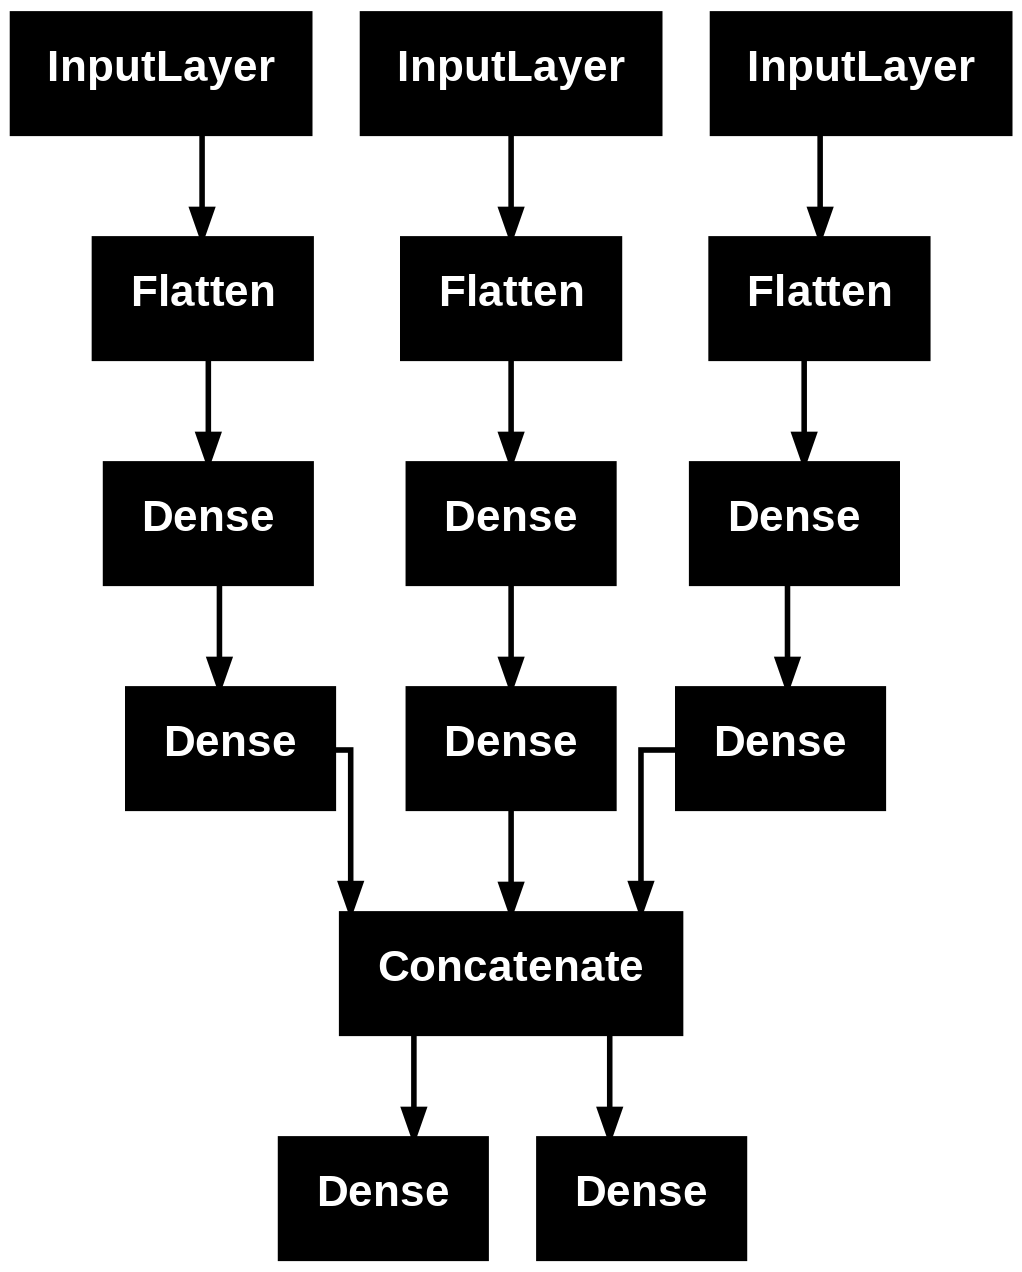

In [26]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [27]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

##Punto 1: Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Carga del conjunto Fashion MNIST
# ============================================================
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los valores de los pixeles a [0, 1]
X_train = train_imgs.astype('float32') / 255.0
y_train = train_lbls
X_test = test_imgs.astype('float32') / 255.0
y_test = test_lbls

# ============================================================
# Definición del modelo (API funcional)
# ============================================================
tf.keras.backend.clear_session()

entrada = tf.keras.Input(shape=(28, 28), name='entrada_img')
x_flat = tf.keras.layers.Flatten(name='aplanado')(entrada)

# Capas densas con activaciones ReLU
densa_1 = tf.keras.layers.Dense(128, activation='relu', name='densa_1')(x_flat)
densa_2 = tf.keras.layers.Dense(64, activation='relu', name='densa_2')(densa_1)

# Concatenación de la capa densa_2 y la capa aplanada
fusion = tf.keras.layers.Concatenate(name='fusion')([densa_2, x_flat])

# Dos salidas independientes
salida_A = tf.keras.layers.Dense(10, activation='softmax', name='salida_A')(densa_2)
salida_B = tf.keras.layers.Dense(10, activation='softmax', name='salida_B')(fusion)

# Creación del modelo final
modelo = tf.keras.Model(inputs=entrada, outputs=[salida_A, salida_B])

# ============================================================
# Compilación y entrenamiento
# ============================================================
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelo.compile(optimizer=opt,
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy","accuracy"])


historial = modelo.fit(X_train, [y_train, y_train],
                       epochs=10,
                       batch_size=64,
                       validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1.5160 - salida_A_accuracy: 0.7443 - salida_A_loss: 0.7364 - salida_B_accuracy: 0.7318 - salida_B_loss: 0.7796 - val_loss: 0.8628 - val_salida_A_accuracy: 0.8473 - val_salida_A_loss: 0.4247 - val_salida_B_accuracy: 0.8439 - val_salida_B_loss: 0.4379
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8045 - salida_A_accuracy: 0.8566 - salida_A_loss: 0.3979 - salida_B_accuracy: 0.8544 - salida_B_loss: 0.4067 - val_loss: 0.7499 - val_salida_A_accuracy: 0.8668 - val_salida_A_loss: 0.3732 - val_salida_B_accuracy: 0.8645 - val_salida_B_loss: 0.3766
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7027 - salida_A_accuracy: 0.8695 - salida_A_loss: 0.3481 - salida_B_accuracy: 0.8682 - salida_B_loss: 0.3546 - val_loss: 0.7379 - val_salida_A_accuracy: 0.8632 - val_salida_A_loss: 0.3684 - val_salida_B_accuracy: 0.8659 - val_salida_B_loss: 0.3694
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6488 - s

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


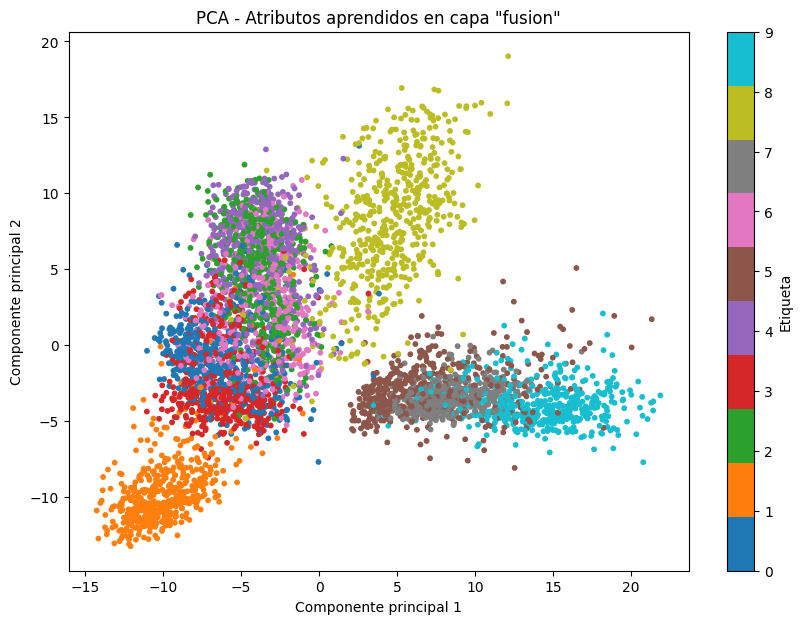

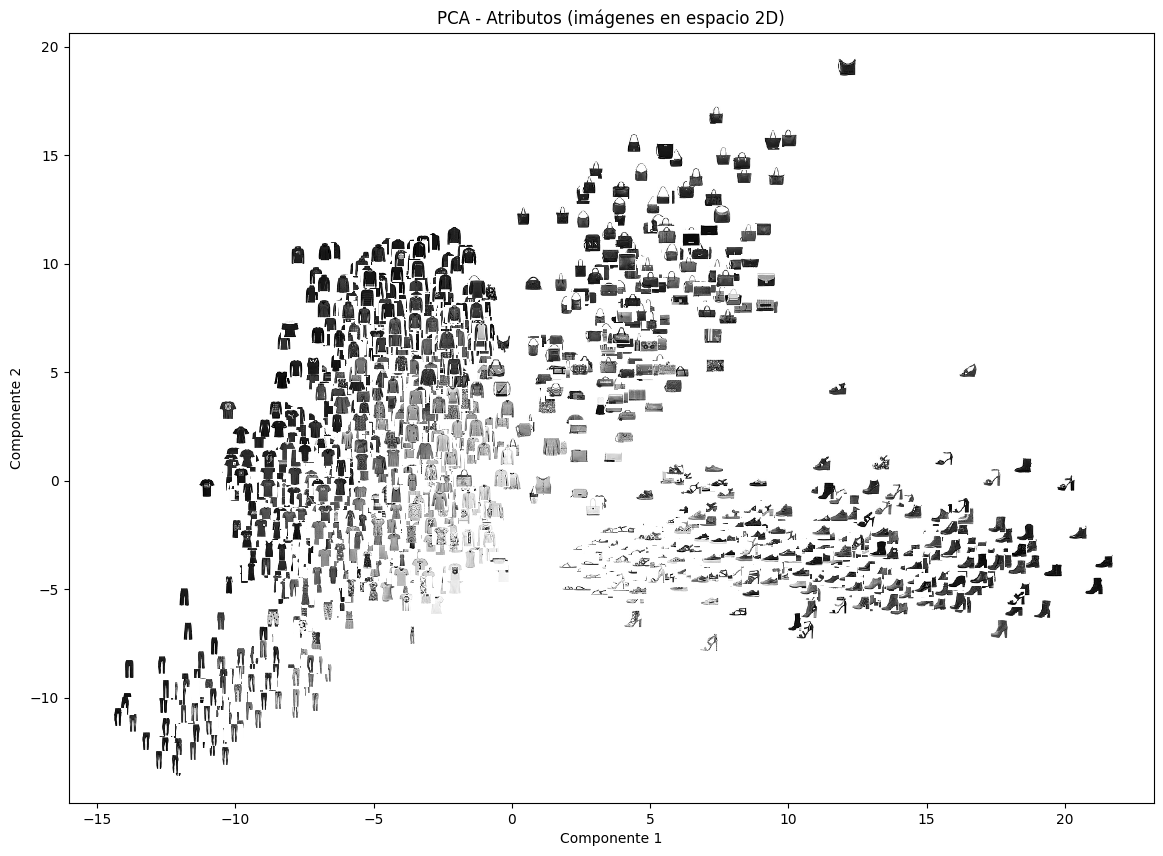

In [34]:
# ============================================================
#   Obtención de los atributos aprendidos en la capa 'fusion'
# ============================================================
modelo_fusion = tf.keras.Model(inputs=modelo.inputs, outputs=modelo.get_layer('fusion').output)

# Seleccionamos un subconjunto para no usar todo el test (por velocidad)
x = X_test[:5000]
y = y_test[:5000]

# Predicción de los atributos
z_fusion = modelo_fusion.predict(x)

# ============================================================
#   PCA sobre los atributos
# ============================================================
zPCA = PCA(n_components=2).fit_transform(z_fusion)

# ============================================================
#   Gráfico PCA en 2D (puntos coloreados por clase)
# ============================================================
plt.figure(figsize=(10,7))
plt.scatter(zPCA[:,0], zPCA[:,1], c=y, cmap='tab10', s=10)
plt.colorbar(label='Etiqueta')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA - Atributos aprendidos en capa "fusion"')
plt.show()

# ============================================================
#   Función para graficar imágenes en el espacio PCA
# ============================================================
def plot_mnist_2d(Z, y, images, img_w=28, img_h=28, zoom=0.45, cmap='binary'):
    fig, ax = plt.subplots(figsize=(14,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
    ax.update_datalim(list(zip(Z[:,0], Z[:,1])))
    ax.autoscale()
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_title('PCA - Atributos (imágenes en espacio 2D)')

# ============================================================
#   Visualización con imágenes en el espacio PCA
# ============================================================
Ni = 2000  # número de imágenes a mostrar
indices = np.random.randint(0, y.shape[0], Ni)
plot_mnist_2d(zPCA[indices], y[indices], x[indices])
plt.show()

##Punto2: Repita el proceso aplicando la técnica de reducción de dimensión UMAP de RAPIDS.

In [36]:
!pip -q install cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com # Instalamos RAPIDS

[2025-11-09 19:45:22.776] [CUML] [info] build_algo set to brute_force_knn because random_state is given


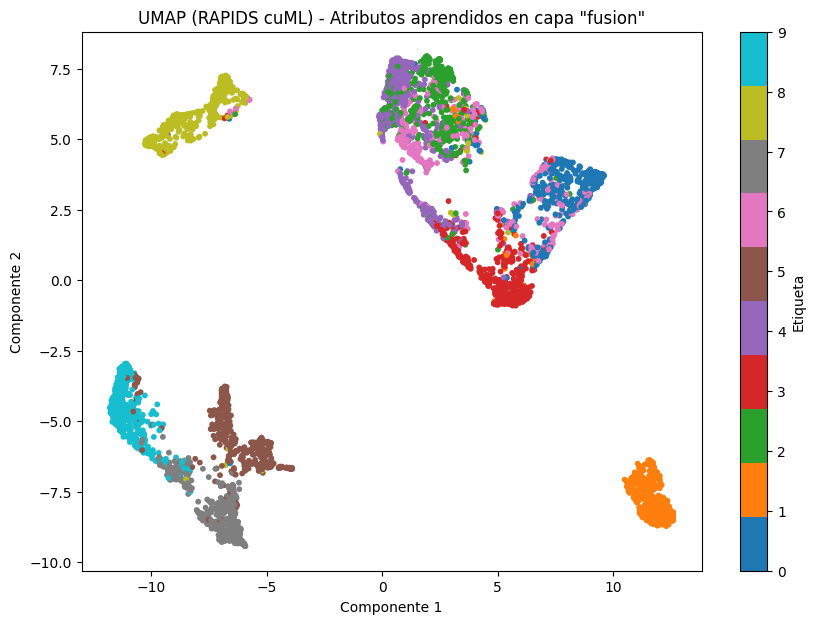

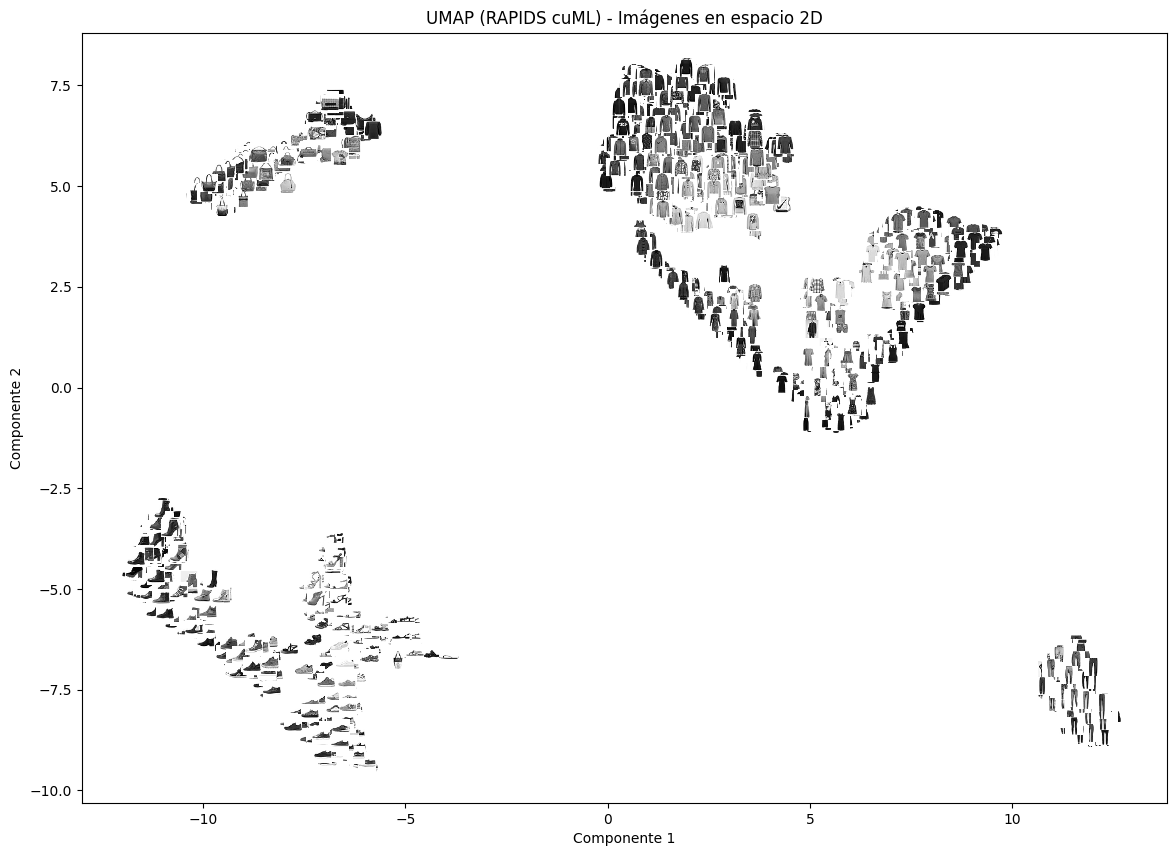

In [37]:
# ============================================================
#   UMAP con RAPIDS cuML
# ============================================================

from cuml.manifold import UMAP  # Importación desde RAPIDS
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
#   Aplicar UMAP sobre los atributos aprendidos
# ============================================================
# Supone que ya tienes 'z_fusion' y 'y' del paso anterior
# Si no, vuelve a ejecutar el bloque que genera z_fusion con el modelo_fusion

umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
zUMAP = umap.fit_transform(z_fusion)

# ============================================================
#   Gráfico UMAP en 2D (puntos coloreados por clase)
# ============================================================
plt.figure(figsize=(10,7))
plt.scatter(zUMAP[:,0], zUMAP[:,1], c=y, cmap='tab10', s=10)
plt.colorbar(label='Etiqueta')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('UMAP (RAPIDS cuML) - Atributos aprendidos en capa "fusion"')
plt.show()

# ============================================================
#   Visualización con imágenes reales (opcional)
# ============================================================
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_umap_2d(Z, y, images, img_w=28, img_h=28, zoom=0.45, cmap='binary'):
    fig, ax = plt.subplots(figsize=(14,10))
    for i in range(Z.shape[0]):
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
    ax.update_datalim(list(zip(Z[:,0], Z[:,1])))
    ax.autoscale()
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_title('UMAP (RAPIDS cuML) - Imágenes en espacio 2D')

# Mostrar algunas imágenes en el espacio UMAP
Ni = 2000
indices = np.random.randint(0, y.shape[0], Ni)
plot_umap_2d(zUMAP[indices], y[indices], x[indices])
plt.show()


##Punto 3: Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno CNNs) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


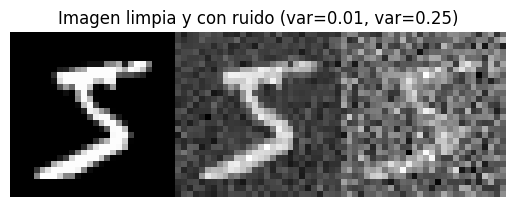

Ejemplo etiquetas: [5 0 4 1 9 2 1 3 1 4]
Par/Impar: [1 0 0 1 1 0 1 1 1 0]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada_limpia      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_ruido_1     │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ entrada_ruido_2     │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ entrada_limpia[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ entrada_ruido_1[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ entrada_ruido_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 12544)     │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12544)     │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 12544)     │          0 │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion              │ (None, 37632)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  9,634,048 │ fusion[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]     

 Total params: 9,724,811 (37.10 MB)

 Trainable params: 9,724,811 (37.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - loss: 1.9467 - salida_digito_accuracy: 0.5640 - salida_digito_loss: 1.4355 - salida_parimpar_accuracy: 0.7515 - salida_parimpar_loss: 0.5105 - val_loss: 0.5911 - val_salida_digito_accuracy: 0.8781 - val_salida_digito_loss: 0.3907 - val_salida_parimpar_accuracy: 0.9254 - val_salida_parimpar_loss: 0.2004
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.5053 - salida_digito_accuracy: 0.9038 - salida_digito_loss: 0.3271 - salida_parimpar_accuracy: 0.9395 - salida_parimpar_loss: 0.1778 - val_loss: 0.4213 - val_salida_digito_accuracy: 0.9149 - val_salida_digito_loss: 0.2836 - val_salida_parimpar_accuracy: 0.9510 - val_salida_parimpar_loss: 0.1378
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.2985 - salida_digito_accuracy: 0.9491 - salida_digito_loss: 0.1936 - salida_parimpar_accuracy: 0.9674 - salida_parimpar_loss: 0.1051 - val_loss: 0.3628 - val_salida_digito_accuracy: 0.9261 - val_salida_digito_loss: 0.2393 - va

In [38]:
# ============================================================
#   LIBRERÍAS
# ============================================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ============================================================
#   CARGA Y PREPROCESAMIENTO DE LOS DATOS (MNIST)
# ============================================================
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Separar validación
X_valid = X_train[-55000:]
y_valid = y_train[-55000:]
X_train = X_train[:-55000]
y_train = y_train[:-55000]

# Normalizar y añadir canal (para CNNs)
X_train = X_train[..., np.newaxis] / 255.
X_valid = X_valid[..., np.newaxis] / 255.
X_test  = X_test[..., np.newaxis]  / 255.

print(X_train.shape, X_valid.shape, X_test.shape)

# ============================================================
#   CREAR TRES ENTRADAS: LIMPIA + RUIDO (var = 0.01 y 0.25)
# ============================================================
varianzas = [0.01, 0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test  = [X_test]

for var_i in varianzas:
    for (data, target_list) in [(X_train, inputs_train),
                                (X_valid, inputs_valid),
                                (X_test, inputs_test)]:
        dim = data.shape
        ruido = data + (np.sqrt(var_i) * np.random.randn(*dim))
        ruido = MinMaxScaler().fit_transform(ruido.reshape(dim[0], -1).T).T
        target_list += [ruido.reshape(dim)]

# Verificar visualmente las 3 versiones
plt.imshow(np.c_[inputs_train[0][0,:,:,0],
                 inputs_train[1][0,:,:,0],
                 inputs_train[2][0,:,:,0]], cmap='gray')
plt.axis('off')
plt.title("Imagen limpia y con ruido (var=0.01, var=0.25)")
plt.show()

# ============================================================
#   SEGUNDA SALIDA: PAR (0) o IMPAR (1)
# ============================================================
y_train_B = (y_train % 2)
y_valid_B = (y_valid % 2)
y_test_B  = (y_test % 2)

print("Ejemplo etiquetas:", y_train[:10])
print("Par/Impar:", y_train_B[:10])

# ============================================================
#   ARQUITECTURA FUNCIONAL CON CAPAS CONVOLUCIONALES
# ============================================================
tf.keras.backend.clear_session()

# -------- Entrada 1: imagen limpia --------
inp1 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_limpia')
conv1_1 = tf.keras.layers.Conv2D(32, (3,3), activation='tanh', padding='same')(inp1)
pool1_1 = tf.keras.layers.MaxPooling2D((2,2))(conv1_1)
conv1_2 = tf.keras.layers.Conv2D(64, (3,3), activation='tanh', padding='same')(pool1_1)
flat1 = tf.keras.layers.Flatten()(conv1_2)

# -------- Entrada 2: ruido var=0.01 --------
inp2 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_ruido_1')
conv2_1 = tf.keras.layers.Conv2D(32, (3,3), activation='tanh', padding='same')(inp2)
pool2_1 = tf.keras.layers.MaxPooling2D((2,2))(conv2_1)
conv2_2 = tf.keras.layers.Conv2D(64, (3,3), activation='tanh', padding='same')(pool2_1)
flat2 = tf.keras.layers.Flatten()(conv2_2)

# -------- Entrada 3: ruido var=0.25 --------
inp3 = tf.keras.layers.Input(shape=(28, 28, 1), name='entrada_ruido_2')
conv3_1 = tf.keras.layers.Conv2D(32, (3,3), activation='tanh', padding='same')(inp3)
pool3_1 = tf.keras.layers.MaxPooling2D((2,2))(conv3_1)
conv3_2 = tf.keras.layers.Conv2D(64, (3,3), activation='tanh', padding='same')(pool3_1)
flat3 = tf.keras.layers.Flatten()(conv3_2)

# -------- Concatenación de características extraídas --------
fusion = tf.keras.layers.Concatenate(name='fusion')([flat1, flat2, flat3])

# -------- Capas densas posteriores --------
densa1 = tf.keras.layers.Dense(256, activation='tanh')(fusion)
drop1 = tf.keras.layers.Dropout(0.3)(densa1)
densa2 = tf.keras.layers.Dense(128, activation='tanh')(drop1)

# -------- Dos salidas --------
# Salida A: estimación del dígito (0–9)
salida_digito = tf.keras.layers.Dense(10, activation='softmax', name='salida_digito')(densa2)

# Salida B: estimación par/impar
salida_parimpar = tf.keras.layers.Dense(1, activation='sigmoid', name='salida_parimpar')(densa2)

# Crear modelo final
modelo_cnn = tf.keras.Model(inputs=[inp1, inp2, inp3],
                            outputs=[salida_digito, salida_parimpar])

modelo_cnn.summary()

# ============================================================
#   COMPILACIÓN Y ENTRENAMIENTO
# ============================================================
modelo_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'salida_digito': 'sparse_categorical_crossentropy',
        'salida_parimpar': 'binary_crossentropy'
    },
    metrics={
        'salida_digito': 'accuracy',
        'salida_parimpar': 'accuracy'
    }
)

hist = modelo_cnn.fit(
    [inputs_train[0], inputs_train[1], inputs_train[2]],
    [y_train, y_train_B],
    validation_data=([inputs_valid[0], inputs_valid[1], inputs_valid[2]],
                     [y_valid, y_valid_B]),
    epochs=5,
    batch_size=128
)


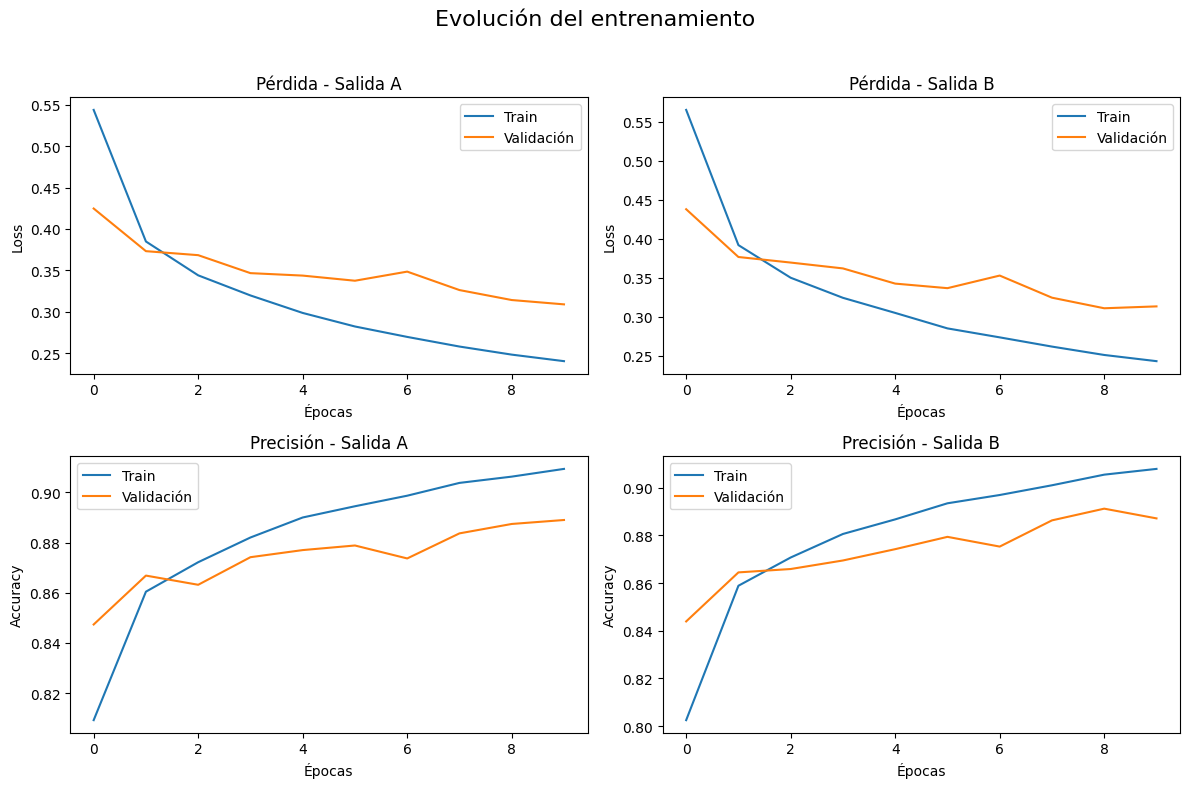

In [40]:
import matplotlib.pyplot as plt

# ============================================================
# CURVAS DE ENTRENAMIENTO Y VALIDACIÓN
# ============================================================
hist = historial.history

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Evolución del entrenamiento', fontsize=16)

# ------------------------------------------------------------
# Pérdida de salida A
axes[0,0].plot(hist['salida_A_loss'], label='Train')
axes[0,0].plot(hist['val_salida_A_loss'], label='Validación')
axes[0,0].set_title('Pérdida - Salida A')
axes[0,0].set_xlabel('Épocas')
axes[0,0].set_ylabel('Loss')
axes[0,0].legend()

# ------------------------------------------------------------
# Pérdida de salida B
axes[0,1].plot(hist['salida_B_loss'], label='Train')
axes[0,1].plot(hist['val_salida_B_loss'], label='Validación')
axes[0,1].set_title('Pérdida - Salida B')
axes[0,1].set_xlabel('Épocas')
axes[0,1].set_ylabel('Loss')
axes[0,1].legend()

# ------------------------------------------------------------
# Precisión de salida A
axes[1,0].plot(hist['salida_A_accuracy'], label='Train')
axes[1,0].plot(hist['val_salida_A_accuracy'], label='Validación')
axes[1,0].set_title('Precisión - Salida A')
axes[1,0].set_xlabel('Épocas')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].legend()

# ------------------------------------------------------------
# Precisión de salida B
axes[1,1].plot(hist['salida_B_accuracy'], label='Train')
axes[1,1].plot(hist['val_salida_B_accuracy'], label='Validación')
axes[1,1].set_title('Precisión - Salida B')
axes[1,1].set_xlabel('Épocas')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
